In [1]:
import os
import glob
import datetime
import numpy as np
import pandas as pd
import xarray as xr

from osgeo import gdal
#from gistool import rasterize
import pyhdf
from pyhdf.SD import SD
import geopandas as gpd

from scipy import stats
from scipy import integrate
from numpy import exp
import math
from pymannkendall import original_test as mk

import matplotlib as mpl
import matplotlib.pyplot as plt
## set the line width of the hatch
mpl.rcParams['hatch.linewidth'] = 0.5
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import matplotlib.ticker as mticker

In [2]:
import rioxarray as rxr
dem = rxr.open_rasterio('D:/LMRB/1km DEM global/lmrb.tif')
countries = gpd.read_file('D:/LMRB/wb_countries_admin0_10m_china/wb_countries_admin0_10m/WB_countries_Admin0_10m_area.shp')
mainstream = gpd.read_file('D:/LMRB/GRADES-HYDRODL/pfaf_level_02/lmrb.shp')
shape = gpd.read_file('D:/LMRB/DEM1km/_SupplementalData/Shapefile/Shapefile_Mekong_Boundary.shp')
pop = rxr.open_rasterio('D:/LMRB/SocioEconomic/SocioEconomic/Population_Count/gpw_v4_pupulation_2020_Mekong.tif')

C:\Users\bn_li\AppData\Local\Temp\ipykernel_22472\1230506065.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('YlOrRd', len(boundaries)-1)
c:\Users\bn_li\.conda\envs\LBN\lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\bn_li\.conda\envs\LBN\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\Users\bn_li\.conda\envs\LBN\lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. P

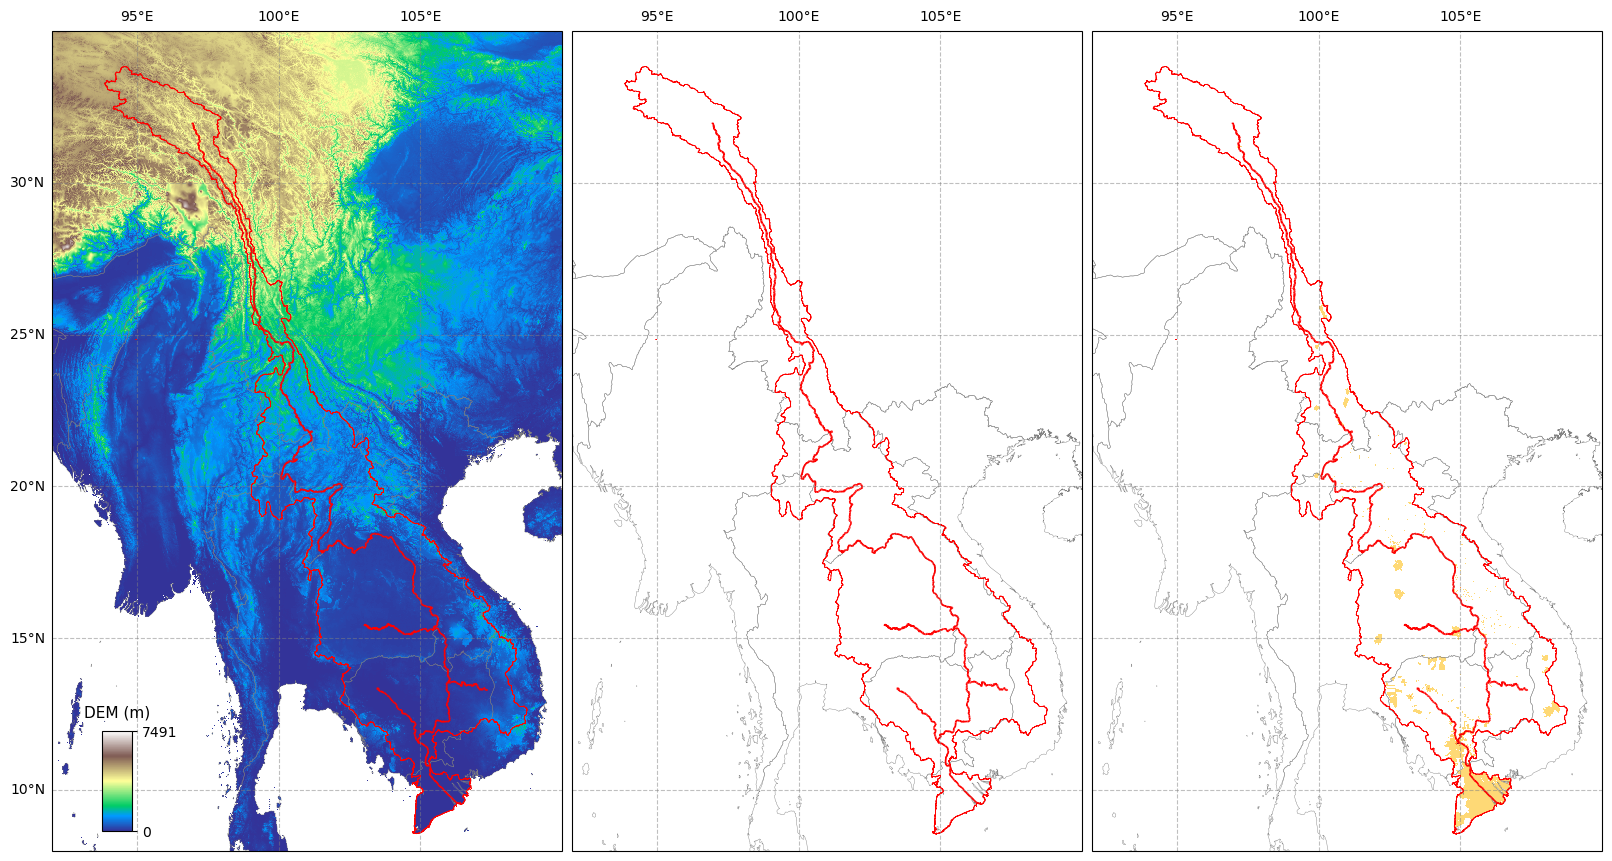

In [6]:
projection = ccrs.PlateCarree()
fig, axes = plt.subplots(1,3,figsize=(20,20),subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.02)  # Adjust these values as needed
extent = [92, 110, 8, 35]
for ax in axes:
        ax.set_extent(extent, crs=projection)
        # ax.set_facecolor('steelblue')

dem1 = dem.isel(band=0)
dem1.plot.imshow(ax=axes[0], cmap='terrain', add_labels=False, vmax=7491, vmin=0, add_colorbar=False)
countries.plot(ax=axes[0], facecolor='none', edgecolor='gray', linewidth=0.3)
mainstream_6 = mainstream[mainstream['order_'] >= 6]
mainstream_6.plot(ax=axes[0], facecolor='none', edgecolor='red', linewidth=1.2)
shape.plot(ax=axes[0], facecolor='none', edgecolor='red', linewidth=0.5)

countries.plot(ax=axes[1], facecolor='none', edgecolor='gray', linewidth=0.3)
mainstream_6 = mainstream[mainstream['order_'] >= 6]
mainstream_6.plot(ax=axes[1], facecolor='none', edgecolor='red', linewidth=1.2)
shape.plot(ax=axes[1], facecolor='none', edgecolor='red', linewidth=0.5)


boundaries = [0, 200, 3000, 10000, 15000, 50000]
norm = mpl.colors.BoundaryNorm(boundaries, ncolors=len(boundaries)-1, clip=True)
cmap = mpl.cm.get_cmap('YlOrRd', len(boundaries)-1)
# Create a custom colormap that includes a transparent color for 0 values
cmap_colors = cmap(np.arange(cmap.N))
cmap_colors[0] = [0, 0, 0, 0]  # Set the color for 0 values to transparent
custom_cmap = mpl.colors.ListedColormap(cmap_colors)
pop1 = pop.isel(band=0)
pop1.plot.imshow(ax=axes[2], cmap=custom_cmap, norm=norm, add_labels=False, add_colorbar=False)
countries.plot(ax=axes[2], facecolor='none', edgecolor='gray', linewidth=0.3)
mainstream_6 = mainstream[mainstream['order_'] >= 6]
mainstream_6.plot(ax=axes[2], facecolor='none', edgecolor='red', linewidth=1.2)
shape.plot(ax=axes[2], facecolor='none', edgecolor='red', linewidth=0.5)



gl = axes[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.8, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([95,100,105])
gl.ylocator = mticker.FixedLocator([10, 15, 20, 25, 30])
for ax in axes[1:]:
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.8, color='gray', alpha=0.5, linestyle='--')
        gl.xlabels_bottom = False
        gl.ylabels_right = False
        gl.ylabels_left = False
        gl.xlocator = mticker.FixedLocator([95,100,105])
        
ticks = [0, 7491]
norm = mpl.colors.Normalize(vmin=0, vmax=7491)
pos = axes[0].get_position()
width = 0.015
height = 0.05
cax = fig.add_axes([pos.xmin+0.025, pos.ymin+0.01, width, height])
cbar = mpl.colorbar.ColorbarBase(cax, cmap='terrain', norm=norm, extend='neither', orientation='vertical')
# cbar.ax.set_xlabel('DEM (m)', fontsize=12)
cbar.ax.set_title('DEM (m)', fontsize=11, pad=10)  # Adjust 'pad' as needed
cbar.set_ticks(ticks)


In [ ]:

subplot_names = ['(a) Annual Volume', '(b) Wet Season Volume', '(c) Dry Season Volume', '(d) Minima Monthly Flow']
for ax, name in zip(axes.flatten(), subplot_names):
        ax.text(0.02, 0.02, name, transform=ax.transAxes, fontsize=12, verticalalignment='bottom', horizontalalignment='left')